In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

pd.set_option('display.max_columns', 100)

In [2]:
import os
%load_ext rpy2.ipython
os.environ['R_HOME'] = '/home/marie-anne/anaconda3/envs/RNAseq/lib/R'

In [3]:
raw_ds = pd.read_csv('GDS4389_full.soft', sep='\n').iloc[:, 0].str.split('\t', expand=True)

raw_ds.columns = raw_ds.iloc[83]
ds = raw_ds.copy().iloc[84:-1]

In [4]:
ds = ds.rename(columns = dict(zip(ds.iloc[:, 2:9].columns, ['control']* 7)))
ds = ds.rename(columns = dict(zip(ds.iloc[:, 9:24].columns, ['Alcoholic_hepatitis']* 15)))

ds[ds.columns[2:24]] = ds.iloc[:, 2:24].astype('float')


In [5]:
ds.iloc[:, ds.columns.isin(['control', 'Alcoholic_hepatitis'])]

83,control,control,control,control,control,control,control,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis,Alcoholic_hepatitis
84,4.79277,5.45498,5.19184,5.50877,4.91237,5.56403,5.32863,5.63410,5.13141,5.41853,5.43280,6.59699,6.29999,6.89184,5.65776,7.52445,5.57675,6.49148,5.80766,7.42827,5.97048,6.51583
85,5.61580,4.99794,5.53570,5.63647,5.07390,5.38995,5.63599,5.71501,5.80119,5.69653,5.68389,6.59919,6.15388,6.32751,5.70295,5.68389,6.12630,5.77844,5.68389,5.66299,5.56038,5.62843
86,3.52864,3.65340,3.60249,3.86442,3.25039,3.07857,2.89638,3.50332,3.57198,3.73776,3.41236,2.86391,3.39845,3.21568,3.34345,3.35796,3.39957,4.10569,3.80830,3.88140,3.38408,3.41124
87,4.19136,4.19136,4.19136,4.19136,4.19136,4.12721,4.19136,4.19136,4.19136,4.19136,4.19136,4.19136,4.19136,4.17679,4.19136,4.19136,4.19136,4.29836,4.19136,4.19136,4.19136,4.20178
88,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54754,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435,2.32435
54755,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.37020,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275
54756,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.37562,2.32275,2.32275,2.32275,2.32275,2.36632,2.32275,2.32275,2.32275,2.32275,2.32275
54757,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275,2.32275


## Analysis of PDCD1, CD274, PDCD1LG2

In [6]:
gene_interest = ['PDCD1', 'CD274', 'PDCD1LG2']

In [7]:
def plot_expr(df, name):
    g =  df[df.IDENTIFIER == name].transpose().iloc[2:23]
    g.plot(kind='bar', legend=False)
    plt.title(f'Expression of {name} by samples')
    plt.xlabel(None)

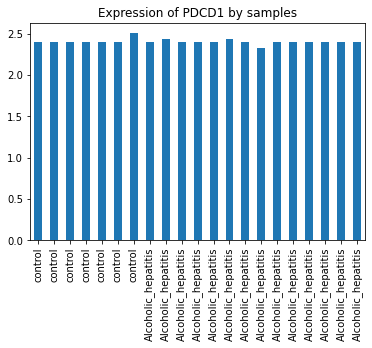

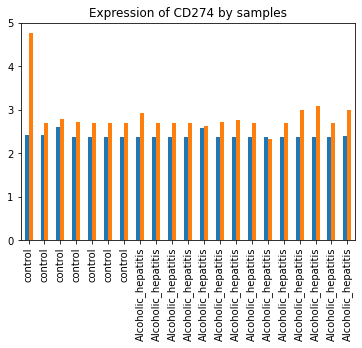

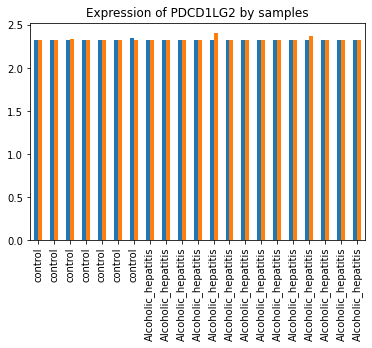

In [8]:
for gene in gene_interest:
    plot_expr(ds, gene)

<AxesSubplot:xlabel='IDENTIFIER', ylabel='value'>

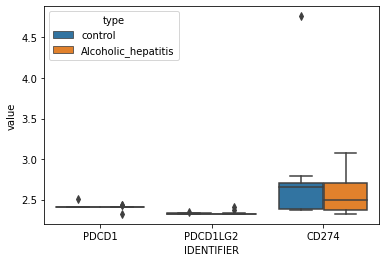

In [9]:
ds_t = ds[ds.IDENTIFIER.isin(gene_interest)].set_index('IDENTIFIER').iloc[:, 1:23].unstack().reset_index().rename(columns={83:'type', 0:'value'})

sns.boxplot(y='value', x='IDENTIFIER', hue='type', data=ds_t)

In [44]:
fc = pd.read_csv('results_GSE28619.csv', index_col=2)
fc.head()

,ID,Gene.title,Gene.ID,UniGene.title,UniGene.symbol,UniGene.ID,Nucleotide.Title,GI,GenBank.Accession,Platform_CLONEID,Platform_ORF,Platform_SPOTID,Chromosome.location,Chromosome.annotation,GO.Function,GO.Process,GO.Component,GO.Function.ID,GO.Process.ID,GO.Component.ID,logFC,AveExpr,t,P.Value,adj.P.Val,B
Gene.symbol,,,,,,,,,,,,,,,,,,,,,,,,,,
AKR1B10,206561_s_at,aldo-keto reductase family 1 member B10,57016,NaN,NaN,NaN,Homo sapiens aldo-keto reductase family 1 memb...,223468662.0,NM_020299,NaN,NaN,NaN,7q33,"Chromosome 7, NC_000007.14 (134527592..134541414)",aldo-keto reductase (NADP) activity///geranylg...,cellular aldehyde metabolic process///daunorub...,cytosol///extracellular exosome///lysosome,GO:0004033///GO:0045550///GO:0047718///GO:0005...,GO:0006081///GO:0044597///GO:0007586///GO:0044...,GO:0005829///GO:0070062///GO:0005764,8.789014,10.449615,24.076498,1.725956e-16,5.181046e-12,27.828916
SLC16A10,222939_s_at,solute carrier family 16 member 10,117247,NaN,NaN,NaN,yw69a04.s1 Soares_placenta_8to9weeks_2NbHP8to9...,1148777.0,N30257,NaN,NaN,NaN,6q21,"Chromosome 6, NC_000006.12 (111087503..111227125)",amino acid transmembrane transporter activity/...,amino acid transmembrane transport///amino aci...,basolateral plasma membrane///integral compone...,GO:0015171///GO:0015173///GO:0015349///GO:0005215,GO:0003333///GO:0006865///GO:0015801///GO:0070327,GO:0016323///GO:0016021///GO:0005887///GO:0005886,-3.006673,3.531287,-23.751967,2.257541e-16,5.181046e-12,27.573051
DTNA,227084_at,dystrobrevin alpha,1837,NaN,NaN,NaN,xz88a09.x1 NCI_CGAP_Lu24 Homo sapiens cDNA clo...,6835857.0,AW339310,NaN,NaN,NaN,18q12,"Chromosome 18, NC_000018.10 (34493290..34891844)",PDZ domain binding///protein binding///zinc io...,chemical synaptic transmission///neuromuscular...,axon///cell junction///cytoplasm///extrinsic c...,GO:0030165///GO:0005515///GO:0008270,GO:0007268///GO:0007274///GO:0007165///GO:0006941,GO:0030424///GO:0030054///GO:0005737///GO:0031...,3.617429,5.342216,23.476597,2.842824e-16,5.181046e-12,27.352906
EPB41L4B,220524_at,erythrocyte membrane protein band 4.1 like 4B,54566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9q31-q32,"Chromosome 9, NC_000009.12 (109171974..1093209...",cytoskeletal protein binding///structural cons...,actomyosin structure organization///positive r...,apical part of cell///bicellular tight junctio...,GO:0008092///GO:0005200,GO:0031032///GO:0045785///GO:0010628///GO:0051...,GO:0045177///GO:0005923///GO:0005737///GO:0005...,-3.465783,4.045521,-23.083673,3.967465e-16,5.423028e-12,27.033834
GOLM1,217771_at,golgi membrane protein 1,51280,NaN,NaN,NaN,"Homo sapiens golgi membrane protein 1 (GOLM1),...",260064066.0,NM_016548,NaN,NaN,NaN,9q21.33,"Chromosome 9, NC_000009.12 (86026141..86100201...",protein binding,nucleus organization///regulation of lipid met...,Golgi apparatus///extracellular exosome///extr...,GO:0005515,GO:0006997///GO:0019216,GO:0005794///GO:0070062///GO:0005615///GO:0005887,4.869683,7.592955,21.925199,1.094043e-15,1.196337e-11,26.057687


#### Differential expr

In [96]:
fc_int = fc[fc.index.isin(gene_interest)][['logFC', 'AveExpr', 'adj.P.Val', 'B', '-log10(P-value)']]
fc['-log10(P-value)'] = -np.log(fc['adj.P.Val'])
fc_int

,logFC,AveExpr,adj.P.Val,B,-log10(P-value)
Gene.symbol,,,,,
PDCD1LG2,-0.003622,2.323897,0.393283,-6.417240,0.933226
CD274,-0.260685,2.835395,0.461077,-6.613279,0.774190
PDCD1,-0.016034,2.406601,0.505725,-6.724009,0.681761
CD274,-0.030506,2.397508,0.606986,-6.934882,0.499249
PDCD1LG2,0.005090,2.333268,0.779327,-7.266146,0.249324


In [120]:
fc_int.index

Index(['PDCD1LG2', 'CD274', 'PDCD1', 'CD274', 'PDCD1LG2'], dtype='object', name='Gene.symbol')

In [121]:
for i, gene in enumerate(fc_int):
    print(fc_int.logFC.iloc[i], fc_int['-log10(P-value)'].iloc[i], fc_int.index[i])#fc_int)#[gene])

-0.0036215714285727 0.9332258936393959 PDCD1LG2
-0.260684571428575 0.7741896355256637 CD274
-0.0160341142857167 0.6817613532203082 PDCD1
-0.030506390476193 0.499249237549939 CD274
0.0050902095238094 0.2493243727356564 PDCD1LG2


75

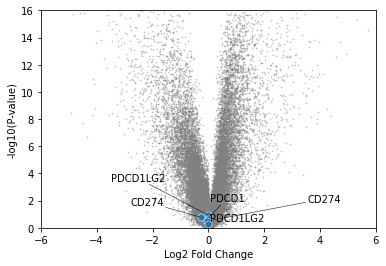

In [152]:
sns.scatterplot(x='logFC', y='-log10(P-value)', data=fc, color='grey', alpha=0.5, s=2, edgecolor=None)
ax = sns.scatterplot(x='logFC', y='-log10(P-value)', data=fc_int, s=50, linewidth=0.5)
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(P-value)')
plt.ylim(0, 16)
plt.xlim(-6, 6)

txts = []
for i, gene in enumerate(fc_int):
    x = fc_int.logFC.iloc[i]
    y = fc_int['-log10(P-value)'].iloc[i]
    txts.append(ax.text(x, y, fc_int.index[i]))
adjust_text(txts, expand_text=(2, 2), arrowprops=dict(arrowstyle="-", color='k', lw=0.5))